In [1]:
import xapres as xa
import xarray as xr
import os
import matplotlib.pyplot as plt
import rioxarray
import pandas as pd
import glob
import numpy as np

In [13]:
sites = ["LTG", "Lake1", "Lake2", "Takahe1_204", "Takahe2_203"]
# source = "/Users/jkingslake/Documents/data/thwaites_apres/archiving/level_0/unattended/"
dest ='/Users/jkingslake/Documents/data/thwaites_apres/archiving/level_1/'

def load(site):
    print(f"Loading from {dest} {site}")

    ds = xr.open_mfdataset(f"{dest}/*{site}*.nc", engine="netcdf4")

    print (f"Dataset size: {ds.nbytes/1e9:.2f} GB")
    print(f"number of bursts: {ds.sizes['time']}")
    print(f"number of chirps: {ds.sizes['chirp_num']}")

    return ds

In [14]:
def load_and_chunk_tozarr(site):
    ds = load(site)
    print('Chunking and saving to zarr...')
    ds.chunk({'time': 10}).to_zarr(f"zarrs_temp/{site}_level_1.zarr", mode='w')
    return ds

In [15]:
load_and_chunk_tozarr(sites[0])

Loading from /Users/jkingslake/Documents/data/thwaites_apres/archiving/level_1/ LTG
Dataset size: 11.34 GB
number of bursts: 351
number of chirps: 100
Chunking and saving to zarr...


KeyboardInterrupt: 

In [4]:
profile_stacked = ds.chirp_stacked.computeProfile(max_range=3000)
ds = ds.assign({'profile_stacked': profile_stacked})

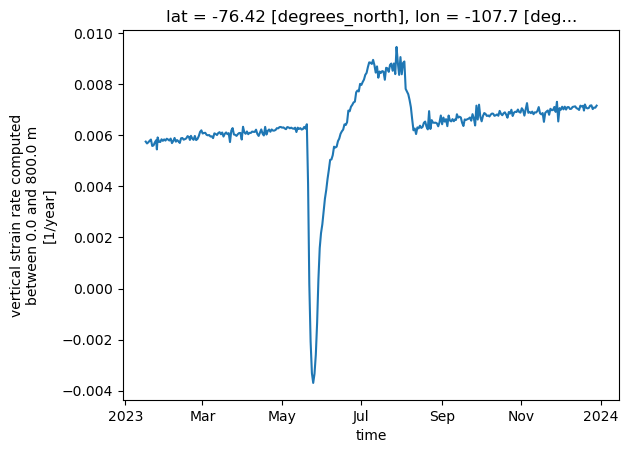

In [8]:
ds.profile_stacked.displacement_timeseries().strain_rate.plot()

In [14]:
ds

<xarray.Dataset> Size: 11GB
Dimensions:          (time: 351, chirp_num: 100, attenuator_setting_pair: 1,
                      chirp_time: 40001)
Coordinates:
  * time             (time) datetime64[ns] 3kB 2023-01-16T00:52:00 ... 2023-1...
  * chirp_time       (chirp_time) float64 320kB 0.0 2.5e-05 5e-05 ... 1.0 1.0
  * chirp_num        (chirp_num) int64 800B 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
    filename         (time) <U23 32kB dask.array<chunksize=(48,), meta=np.ndarray>
    folder_name      (time) <U9 13kB dask.array<chunksize=(48,), meta=np.ndarray>
    burst_number     (time) int64 3kB dask.array<chunksize=(48,), meta=np.ndarray>
    AFGain           (attenuator_setting_pair) int64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    attenuator       (attenuator_setting_pair) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    orientation      (time) <U7 10kB dask.array<chunksize=(48,), meta=np.ndarray>
    lat              float64 8B -76.42
    lon              float64 8B -107.7
    spatial_ref      int64 8B 0
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (time, chirp_num, attenuator_setting_pair, chirp_time) float64 11GB dask.array<chunksize=(48, 100, 1, 40001), meta=np.ndarray>
    latitude         (time) float64 3kB dask.array<chunksize=(48,), meta=np.ndarray>
    longitude        (time) float64 3kB dask.array<chunksize=(48,), meta=np.ndarray>
    battery_voltage  (time) float64 3kB dask.array<chunksize=(48,), meta=np.ndarray>
    temperature_1    (time) float64 3kB dask.array<chunksize=(48,), meta=np.ndarray>
    temperature_2    (time) float64 3kB dask.array<chunksize=(48,), meta=np.ndarray>
    chirp_stacked    (time, attenuator_setting_pair, chirp_time) float64 112MB dask.array<chunksize=(48, 1, 40001), meta=np.ndarray>
Attributes:
    processing:  Created on 2025-09-12 09:31:15.112149
    readme:      Unattended autonomous radio-echo sounder (ApRES) measurement...

In [6]:
from dask.distributed import Client

client = Client()
client

/Users/jkingslake/.local/share/mamba/envs/pdem_tools/lib/python3.13/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 62051 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:62051/status,
Dashboard: http://127.0.0.1:62051/status,Workers: 4
Total threads: 8,Total memory: 24.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:62052,Workers: 0
Dashboard: http://127.0.0.1:62051/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:62064,Total threads: 2
Dashboard: http://127.0.0.1:62065/status,Memory: 6.00 GiB
Nanny: tcp://127.0.0.1:62055,


2026-01-14 13:38:37,441 - distributed.scheduler - ERROR - Task 'finalize-hlgfinalizecompute-73c77af761c044fcbd655fb95ac4c6ea' has 20.92 GiB worth of input dependencies, but worker tcp://127.0.0.1:62064 has memory_limit set to 6.00 GiB. It seems like you called client.compute() on a huge collection. Consider writing to distributed storage or slicing/reducing first.
2026-01-14 13:44:18,448 - distributed.scheduler - ERROR - Task 'finalize-hlgfinalizecompute-78480bcc48c64db7a258775de173cc92' has 20.92 GiB worth of input dependencies, but worker tcp://127.0.0.1:62071 has memory_limit set to 6.00 GiB. It seems like you called client.compute() on a huge collection. Consider writing to distributed storage or slicing/reducing first.
2026-01-14 13:48:09,952 - distributed.scheduler - ERROR - Task 'finalize-hlgfinalizecompute-6613d19b4831438185f3c428fe6e7361' has 10.46 GiB worth of input dependencies, but worker tcp://127.0.0.1:62074 has memory_limit set to 6.00 GiB. It seems like you called clien

In [8]:
from dask.diagnostics import ProgressBar

with ProgressBar():
    ds.chunk({'time': 10}).addProfileToDs().to_zarr(f"zarrs_temp/{sites[0]}_level_1.zarr", mode='w')

MemoryError: Task 'finalize-hlgfinalizecompute-78480bcc48c64db7a258775de173cc92' has 20.92 GiB worth of input dependencies, but worker tcp://127.0.0.1:62071 has memory_limit set to 6.00 GiB. It seems like you called client.compute() on a huge collection. Consider writing to distributed storage or slicing/reducing first.

In [6]:
ds.addProfileToDs()

KeyboardInterrupt: 